In [1]:
#Importar Librerias
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#Cargar el dataset
main_path="drive/MyDrive/Dataset_MP"
name= "df_final.csv"
full_path=os.path.join(main_path,name)

In [3]:
df = pd.read_csv(full_path)

In [4]:
# CREAR MUESTRA REPRESENTATIVA
df_modelo, _ = train_test_split(df, train_size=500000, stratify=df['DELAYED'], random_state=42)

print("Tamaño de la muestra:", df_modelo.shape)
print("Proporción de clases:\n", df_modelo['DELAYED'].value_counts(normalize=True))

Tamaño de la muestra: (500000, 13)
Proporción de clases:
 DELAYED
0    0.81389
1    0.18611
Name: proportion, dtype: float64


In [5]:
#ENTRENAMIENTO

X = df_modelo.drop('DELAYED', axis=1)
y = df_modelo['DELAYED']

#Entrenamiento 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

colum_categorica = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
colum_numeric= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE',
                    'SCHEDULED_DEPARTURE_sin', 'SCHEDULED_DEPARTURE_cos',
                    'SCHEDULED_ARRIVAL_sin', 'SCHEDULED_ARRIVAL_cos', 'SCHEDULED_TIME']

def get_preprocessor(model_name):
    sparse = False if model_name == "Hist Gradient Boosting" else True
    return ColumnTransformer([
        ('num', StandardScaler(), colum_numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=sparse), colum_categorica)
    ])

In [6]:
#Modelos para la evaluacion con sus hiperparametros
modelos_param_grid = {
    "Regresión Logística": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        }
    },
    "Hist Gradient Boosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__max_iter': [100, 200],
            'classifier__max_leaf_nodes': [31, 50]
        }
    },
    "Árbol de Decisión": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            'classifier__num_leaves': [31, 50],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__n_estimators': [100, 200]
        }
    }
}



Entrenando Regresión Logística con Undersampling
Mejores parámetros para Regresión Logística: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor score F1 en validación: 0.361

Evaluación del modelo Regresión Logística (Undersampling):

Accuracy: 0.582
Precision: 0.251
Recall: 0.628
F1 Score: 0.359
AUC-ROC: 0.637


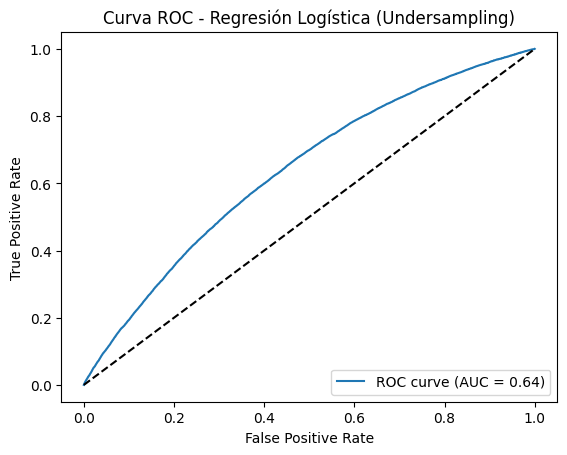


Matrix de confusión
[[58205 43531]
 [ 8665 14599]]

Matriz de confusión:


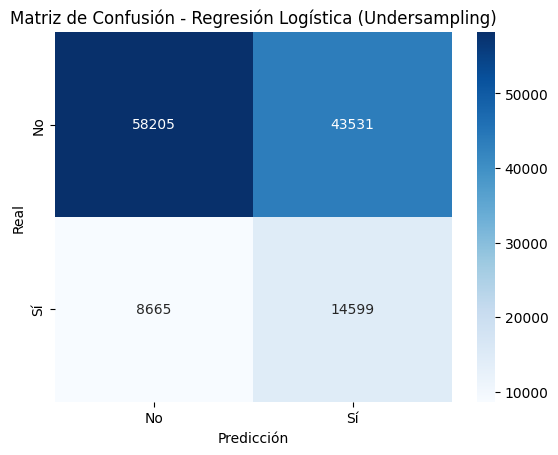


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69    101736
           1       0.25      0.63      0.36     23264

    accuracy                           0.58    125000
   macro avg       0.56      0.60      0.52    125000
weighted avg       0.76      0.58      0.63    125000



Entrenando Hist Gradient Boosting con Undersampling
Mejores parámetros para Hist Gradient Boosting: {'classifier__max_iter': 200, 'classifier__max_leaf_nodes': 50}
Mejor score F1 en validación: 0.400

Evaluación del modelo Hist Gradient Boosting (Undersampling):

Accuracy: 0.648
Precision: 0.296
Recall: 0.647
F1 Score: 0.406
AUC-ROC: 0.701


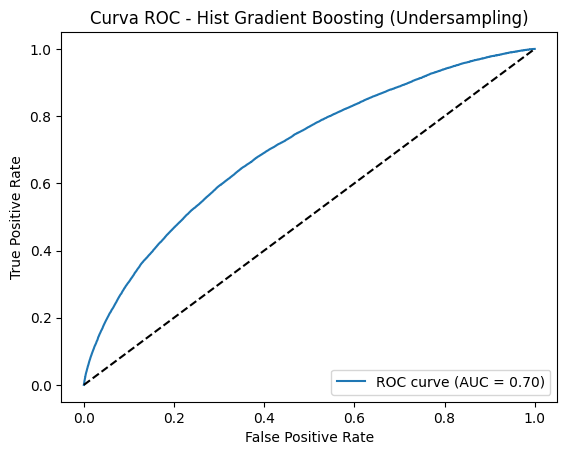


Matrix de confusión
[[65932 35804]
 [ 8217 15047]]

Matriz de confusión:


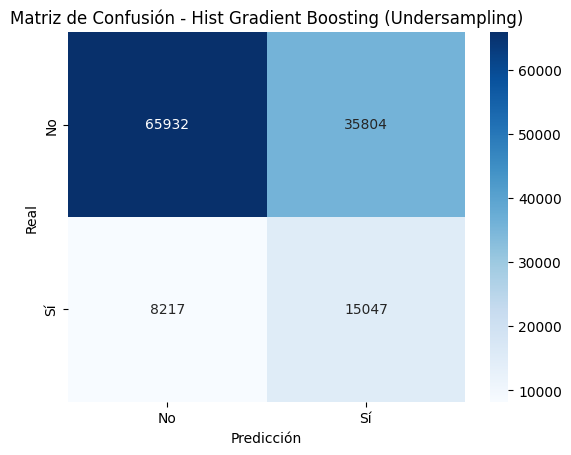


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75    101736
           1       0.30      0.65      0.41     23264

    accuracy                           0.65    125000
   macro avg       0.59      0.65      0.58    125000
weighted avg       0.78      0.65      0.69    125000



Entrenando Árbol de Decisión con Undersampling
Mejores parámetros para Árbol de Decisión: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Mejor score F1 en validación: 0.370

Evaluación del modelo Árbol de Decisión (Undersampling):

Accuracy: 0.604
Precision: 0.262
Recall: 0.622
F1 Score: 0.369
AUC-ROC: 0.653


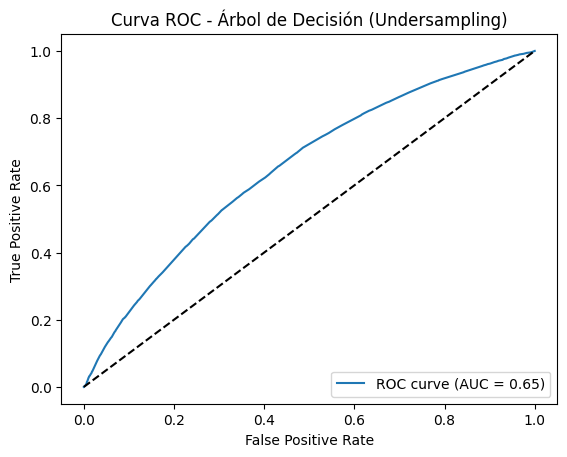


Matrix de confusión
[[61013 40723]
 [ 8804 14460]]

Matriz de confusión:


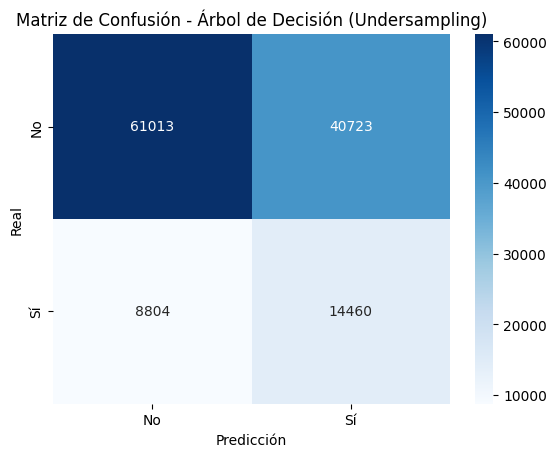


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71    101736
           1       0.26      0.62      0.37     23264

    accuracy                           0.60    125000
   macro avg       0.57      0.61      0.54    125000
weighted avg       0.76      0.60      0.65    125000



Entrenando LightGBM con Undersampling
[LightGBM] [Info] Number of positive: 69791, number of negative: 69791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 139582, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Mejores parámetros para LightGBM: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Evaluación del modelo LightGBM (Undersampling):

Accuracy: 0.649
Precision: 0.296
Recall: 0.642
F1 Score: 0.405
AUC-ROC: 0.703


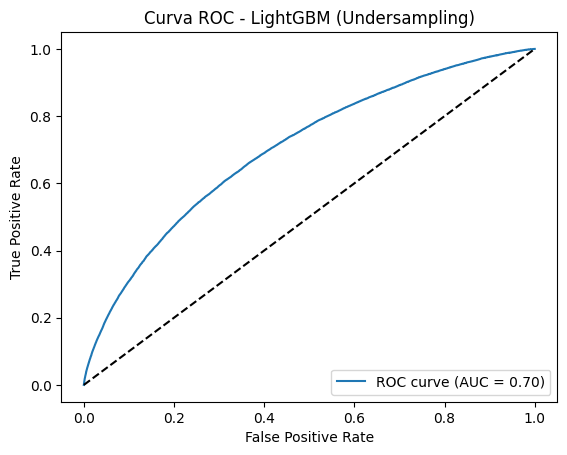


Matrix de confusión
[[66151 35585]
 [ 8317 14947]]

Matriz de confusión:


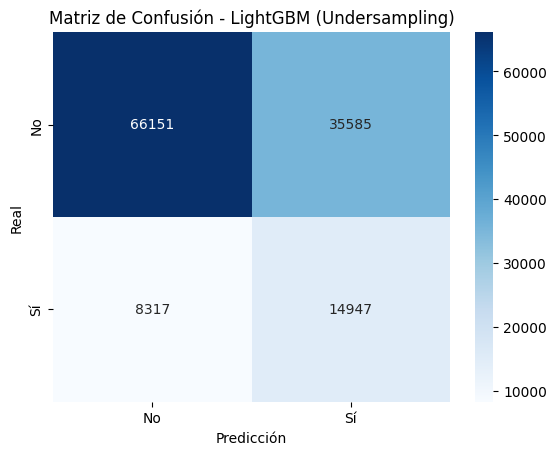


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75    101736
           1       0.30      0.64      0.41     23264

    accuracy                           0.65    125000
   macro avg       0.59      0.65      0.58    125000
weighted avg       0.78      0.65      0.69    125000



In [7]:
#Funcion para Evaluar el modelo
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
    elif hasattr(modelo, "decision_function"):
        y_prob = modelo.decision_function(X_test)
    else:
        y_prob = None

    print(f"\nEvaluación del modelo {nombre_modelo}:\n")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print("AUC-ROC:", round(roc_auc, 3))

        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {nombre_modelo}')
        plt.legend(loc="lower right")
        plt.show()

    print('\nMatrix de confusión')
    print(confusion_matrix(y_test, y_pred))
    print("\nMatriz de confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

for nombre, data in modelos_param_grid.items():
    print(f"\n\nEntrenando {nombre} con Undersampling")
    preprocessor = get_preprocessor(nombre)
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('classifier', data["model"])
    ])
    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Mejores parámetros para {nombre}: {grid.best_params_}")
    print(f"Mejor score F1 en validación: {grid.best_score_:.3f}")
    evaluar_modelo(grid.best_estimator_, X_test, y_test, f"{nombre} (Undersampling)")

In [8]:
#Comparativa y visualización de importancia de variables

import warnings
warnings.filterwarnings("ignore")

#métricas de modelos ya evaluados
resultados_plus = []

#Diccionario para guardar modelos optimizados
modelos_optimizados = {}

for nombre, data in modelos_param_grid.items():
    print(f"\nEntrenando y evaluando {nombre} con Undersampling")

    # Defino preprocessor según modelo (para manejar sparse/dense)
    preprocessor = get_preprocessor(nombre)

    # Pipeline con preprocesador, undersampling y clasificador
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('classifier', data["model"])
    ])

    # GridSearch para buscar mejores hiperparámetros
    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    modelo = grid.best_estimator_
    modelos_optimizados[nombre] = modelo

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    roc_auc = auc(*roc_curve(y_test, y_prob)[:2]) if y_prob is not None else None

    resultados_plus.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc
    })


Entrenando y evaluando Regresión Logística con Undersampling

Entrenando y evaluando Hist Gradient Boosting con Undersampling

Entrenando y evaluando Árbol de Decisión con Undersampling

Entrenando y evaluando LightGBM con Undersampling
[LightGBM] [Info] Number of positive: 69791, number of negative: 69791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 139582, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [9]:
#Tabla comparativa ordenada por F1 Score
df_plus = pd.DataFrame(resultados_plus)
df_plus = df_plus.sort_values(by="F1 Score", ascending=False)

print("\nComparativa Final de Modelos:")
display(df_plus.style.background_gradient(cmap="Blues"))


Comparativa Final de Modelos:


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC-ROC
1,Hist Gradient Boosting,0.647832,0.295904,0.646793,0.406045,0.700956
3,LightGBM,0.648784,0.295793,0.642495,0.405090,0.702882
2,Árbol de Decisión,0.603784,0.262037,0.621561,0.368657,0.652696
0,Regresión Logística,0.582432,0.251144,0.627536,0.358724,0.636544


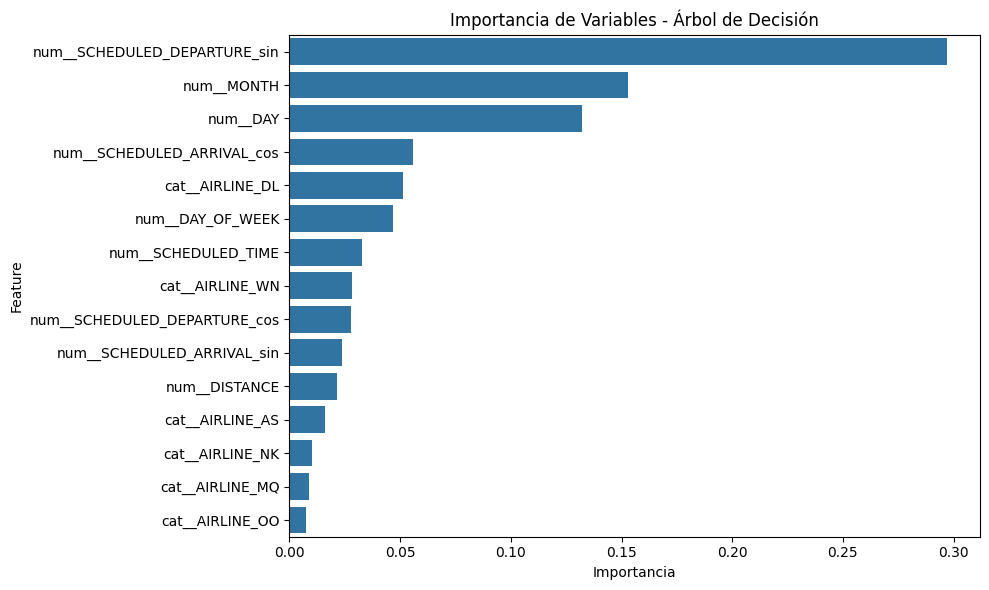

(Hist Gradient Boosting no soporta importancias de variables: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_')


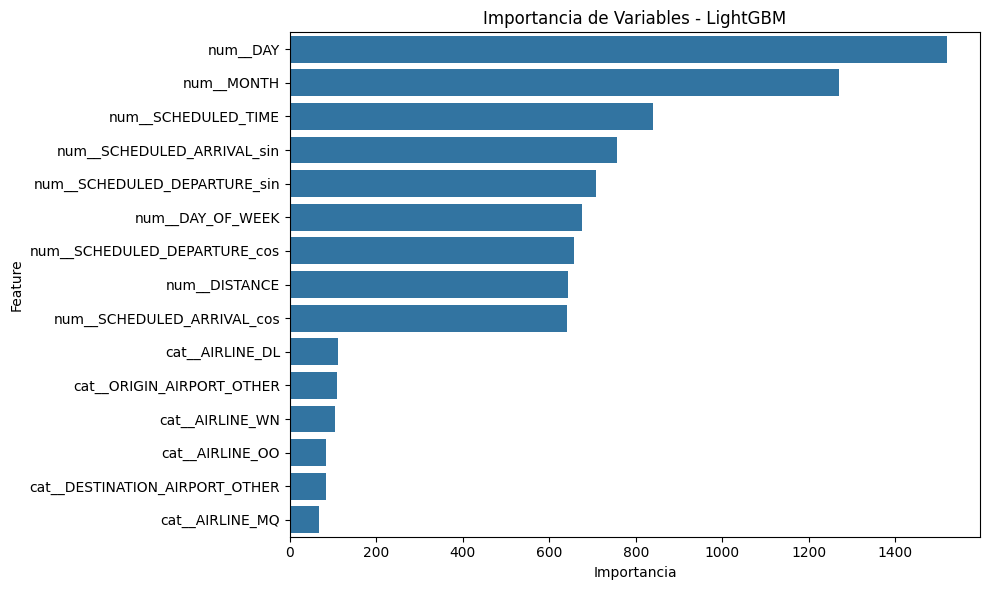

In [10]:
# Importancia de variables
def mostrar_importancia(modelo, nombre_modelo):
    try:
        importancias = modelo.named_steps['classifier'].feature_importances_
        nombres = modelo.named_steps['preprocessor'].get_feature_names_out()
        imp_df = pd.DataFrame({'Feature': nombres, 'Importancia': importancias})
        imp_df = imp_df.sort_values('Importancia', ascending=False).head(15)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=imp_df, x="Importancia", y="Feature")
        plt.title(f"Importancia de Variables - {nombre_modelo}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"({nombre_modelo} no soporta importancias de variables: {e})")

# Mostrar solo para modelos tipo árbol
for nombre in ["Árbol de Decisión", "Hist Gradient Boosting", "LightGBM"]:
    if nombre in modelos_optimizados:
        mostrar_importancia(modelos_optimizados[nombre], nombre)

In [11]:
#Ejemplo predictivo simple de datos de un nuevo vuelo

nuevo_vuelo = pd.DataFrame([{
    'MONTH': 7,
    'DAY': 22,
    'DAY_OF_WEEK': 1,
    'DISTANCE': 950,
    'SCHEDULED_DEPARTURE': 830,  # 08:30 am
    'SCHEDULED_ARRIVAL': 1045,   # 10:45 am
    'AIRLINE': 'AA',
    'ORIGIN_AIRPORT': 'JFK',
    'DESTINATION_AIRPORT': 'LAX'
}])

#Calculamos el SCHEDULED_TIME (duración en minutos)
def calcular_scheduled_time(dep, arr):
    dep = int(str(dep).zfill(4))
    arr = int(str(arr).zfill(4))
    dep_min = (dep // 100) * 60 + (dep % 100)
    arr_min = (arr // 100) * 60 + (arr % 100)
    if arr_min < dep_min:  # caso de vuelos que cruzan medianoche
        arr_min += 1440
    return arr_min - dep_min

nuevo_vuelo['SCHEDULED_TIME'] = calcular_scheduled_time(
    nuevo_vuelo['SCHEDULED_DEPARTURE'].iloc[0],
    nuevo_vuelo['SCHEDULED_ARRIVAL'].iloc[0]
)

# Aplicamos la transformación trigonométrica
def transformar_hora(df, columna):
    df[columna] = df[columna].astype(str).str.zfill(4)
    minutos = df[columna].str[:2].astype(int) * 60 + df[columna].str[2:].astype(int)
    df[columna + '_sin'] = np.sin(2 * np.pi * minutos / 1440)
    df[columna + '_cos'] = np.cos(2 * np.pi * minutos / 1440)
    return df

nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_DEPARTURE')
nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_ARRIVAL')

#Eliminamos columnas originales que no usa el modelo
nuevo_vuelo.drop(columns=['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], inplace=True)

#Predecimos con el mejor modelo
modelo_final = modelos_optimizados['LightGBM']
prediccion = modelo_final.predict(nuevo_vuelo)
probabilidad = modelo_final.predict_proba(nuevo_vuelo)[:, 1]

#Interpretamos resultado
print(f"¿Vuelo retrasado?: {'Sí' if prediccion[0] == 1 else 'No'}")
print(f"Probabilidad de retraso: {probabilidad[0]:.2f}")

¿Vuelo retrasado?: No
Probabilidad de retraso: 0.42
